# Method 1: Using scipy.integrate.odeint method

In [ ]:
# import libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# function that returns the rate of change of Volatage (dV/dt)
def model(V0, t, A, ein):
  A11, A21, A22 = A[0], A[1], A[2]
  B1, B2 = -A11, -A21
  V1, V2 = V0[0], V0[1]

  dV1dt = A11 * V1 + B1 * ein
  dV2dt = A21 * V1 + A22 * V2 + B2 * ein

  return [dV1dt, dV2dt]


In [ ]:
# Initial Conditions
V0 = [0, 0]
A = [-50, -19000, -21.5]
ein = 1.5

# Time Points
t = np.arange(0, .16, 0.0002)

In [ ]:
# solve ODEs
V = odeint(model, V0, t, args=(A, ein,))

V1, V2 = np.hsplit(V, 2)


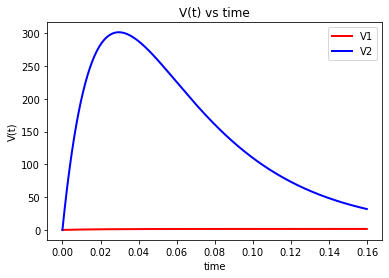

In [ ]:
# plot results
plt.plot(t, V1, 'r-', linewidth=2, label='V1')
plt.plot(t, V2, 'b-', linewidth=2, label='V2')
plt.title(f'V(t) vs time')
plt.xlabel('time')
plt.ylabel('V(t)')
plt.legend()
plt.show()

# Method 2: Using Runge-Kutta4 method

In [ ]:
# Initilization of Constants
h = 0.0002
V1 = V2 = 0
A11, A21, A22 = -50, -19000, -21.5
ein = 1.5
n = 800
t = np.arange(0, .16, h)
V1_list = []
V2_list = []

In [ ]:
def func1(V1):
  return A11 * V1 - A11 * ein


In [ ]:
def func2(V1, V2):
  return A21 * V1 + A22 * V2 - A21 * ein

In [ ]:
for i in range(n):
  
  m11 = func1(V1)
  m21 = func1(V1+m11*h/2)
  m31 = func1(V1+m21*h/2)
  m41 = func1(V1+m31*h)
  

  m12 = func2(V1, V2)
  m22 = func2(V1+h/2, V2+m12*h/2)
  m32 = func2(V1+h/2, V2+m22*h/2)
  m42 = func2(V1+h, V2+m32*h)

  V1 = V1 + ((m11 + 2*m21 + 2*m31 + m41)/6) * h
  V2 = V2 + ((m12 + 2*m22 + 2*m32 + m42)/6) * h
  
  
  V1_list.append(V1)  
  V2_list.append(V2)
  

In [ ]:
print(V1_list)
print(V2_list)

[0.014925249375, 0.029701990037396042, 0.044331699673568106, 0.05881584126667103, 0.07315586324293405, 0.08735319961650459, 0.10140927013285093, 0.11532548041073791, 0.12910322208278996, 0.14274387293465554, 0.15624879704278685, 0.16961934491084862, 0.18285685360476958, 0.1959626468864502, 0.20893803534613997, 0.2217843165334975, 0.23450277508734657, 0.2470946828641411, 0.25956129906515185, 0.2719038703623876, 0.28412363102326343, 0.2962218030340283, 0.30819959622196497, 0.32005820837637355, 0.3317988253683515, 0.34342262126938167, 0.35493075846874056, 0.36632438778973797, 0.3776046486048006, 0.38877266894941, 0.3998295656349071, 0.4107764443601745, 0.4216143998222069, 0.432344515825582, 0.44296786539084165, 0.45348551086179517, 0.46389850401175414, 0.4742078861487109, 0.48441468821947015, 0.4945199309127445, 0.5045246247612242, 0.5144297702426311, 0.5242363578797676, 0.5339453683395694, 0.5435577725311732, 0.5530745317030084, 0.5624965975389226, 0.571824912253351, 0.5810604086855384, 

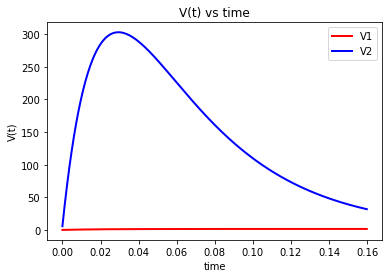

In [ ]:
# plot results
plt.plot(t, V1_list, 'r-', linewidth=2, label='V1')
plt.plot(t, V2_list, 'b-', linewidth=2, label='V2')
plt.title(f'V(t) vs time')
plt.xlabel('time')
plt.ylabel('V(t)')
plt.legend()
plt.show()